# Import Basics

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("sampled_dataset_charlie.csv")

# Prepare Data

In [3]:
#data
training_set = data.sample(frac=0.8, random_state = 1)
test_set = data.loc[~data.index.isin(training_set.index)]
test_set

#training_set.columns.values
#data_columns = ['altmetric_id', 'yules_i_for_abs', 'avg_word_len_abs',
#       'avg_sen_len_abs', 'freq_of_words_great_sent_len_abs',
#       'mendeley_readers', 'citeulikereaders', 'connoteareaders',
#       'blog_users', 'blogs_posts_count', 'news_unique_users',
#       'total_posts_count', 'wiki_posts_count', 'facebook_users',
#       'facebook_posts', 'twitter_users', 'twitter_posts', 'citation_page',
#       'other_articles', 'mean', 'rank', 'perc', 'scored_higher_than',
#       'sample_size', 'users_lecturer', 'users_librarian',
#       'users_student_bachelor', 'users_student_master',
#       'users_student_pg', 'users_student_phd', 'users_student_doct',
#       'users_researcher', 'users_other', 'users_prof_assoc', 'users_prof',
#       'users_medi', 'users_ss', 'users_psych', 'users_earth',
#       'users_agri', 'users_arts', 'users_us', 'users_th', 'users_ie',
#       'users_id', 'users_au', 'users_gb', 'altmetric_score',
#       'altmetric_score_1y', 'altmetric_score_6m', 'altmetric_score_3m',
#       'altmetric_score_1m', 'altmetric_score_1w', 'altmetric_score_6d',
#       'altmetric_score_5d', 'altmetric_score_4d', 'altmetric_score_3d', 'altmetric_score_1d']
data_columns = ['yules_i_for_abs', 'avg_word_len_abs',
       'avg_sen_len_abs', 'freq_of_words_great_sent_len_abs']


training_data = training_set.as_matrix(columns = data_columns)
nan_locs = np.isnan(training_data)
training_data[nan_locs] = 0

training_target = training_set['similarity_score'].values
nan_locs = np.isnan(training_target)
training_target[nan_locs] = 0

test_data = test_set.as_matrix(columns = data_columns)
nan_locs = np.isnan(test_data)
test_data[nan_locs] = 0

test_target = test_set['similarity_score'].values
nan_locs = np.isnan(test_target)
test_target[nan_locs] = 0

# Multi-layer Perceptron

In [4]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(training_data, training_target)

print('R squared: ' + str(reg.score(training_data, training_target)))

R squared: -0.724928679205


# Support Vector Regression

In [5]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(training_data, training_target)

print('R squared: ' + str(svr.score(training_data, training_target)))

R squared: 0.120178090039


# Kernel Ridge Regression

In [6]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
kr.fit(training_data, training_target)

print('R squared: ' + str(kr.score(training_data, training_target)))

R squared: -0.00316429884447


# Decision Tree Regression

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(training_data, training_target)

print('R squared: ' + str(dt.score(training_data, training_target)))

R squared: 0.735630052371


# Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(training_data, training_target)

print('R squared: ' + str(rf.score(training_data, training_target)))

R squared: 0.647360934796


# Gradient Boosting Regression

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(training_data, training_target)

print('R squared: ' + str(gb.score(training_data, training_target)))

R squared: 0.0608704305318


# Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pr = Pipeline([('poly', PolynomialFeatures(degree = 3)),
              ('linear', LinearRegression(fit_intercept = False))])

pr.fit(training_data, training_target)

print('R squared: ' + str(pr.score(training_data, training_target)))

R squared: 0.0101808432343


# Lasso Regression

In [11]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(training_data, training_target)

print('R squared: ' + str(lm.score(training_data, training_target)))

R squared: 0.0


# Elastic Net

In [12]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(training_data, training_target)

print('R squared: ' + str(en.score(training_data, training_target)))

R squared: 0.0


# Least Angle Regression

In [13]:
from sklearn.linear_model import LassoLars
ll = LassoLars()
ll.fit(training_data, training_target)

print('R squared: ' + str(ll.score(training_data, training_target)))

R squared: 0.0


# Bayesian Regression

In [14]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(training_data, training_target)

print('R squared: ' + str(br.score(training_data, training_target)))

R squared: 0.00458667742572


# Stochastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(training_data, training_target)

print('R squared: ' + str(sgd.score(training_data, training_target)))

R squared: -3.70153321457e+27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Rough Work

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

KeyboardInterrupt: 

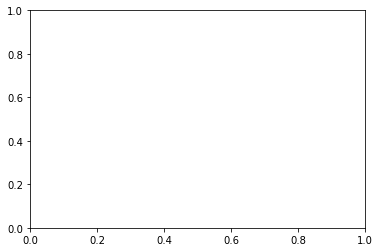

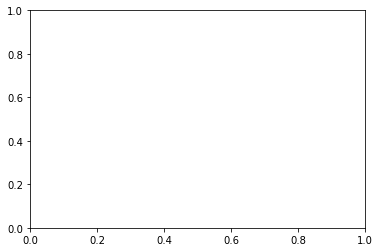

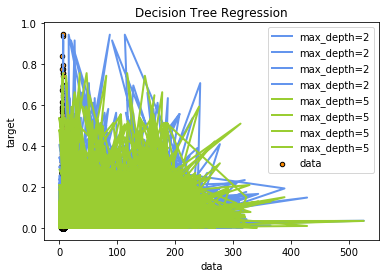

In [30]:
test_prediction = dt.predict(test_data)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(training_data[:,1], training_target, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(test_data, test_target, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(test_data, test_prediction, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [31]:
tree.export_graphviz(dt, out_file='tree.dot')

In [22]:
len(training_target)


14189